In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

from scipy import stats
from sklearn.feature_selection import mutual_info_regression, f_regression
from stepwise_regression import step_reg
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, ElasticNet, TheilSenRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, IsolationForest
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
df_bp = pd.read_excel('F:\DATA SCIENCE\ДАТАСЕТы\ВКР (базовая)/X_bp.xlsx')
df_nup = pd.read_excel('F:\DATA SCIENCE\ДАТАСЕТы\ВКР (базовая)/X_nup.xlsx')

In [3]:
df = pd.merge(df_bp, df_nup, how='inner', on='Unnamed: 0')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.index.rename('index', inplace=True)

In [4]:
df_23 = df.iloc[:23,:]
df_23

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
index,,,,,,,,,,,,,
0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.000000,3000.000000,220.0,0,4.0,57.0
1,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.000000,3000.000000,220.0,0,4.0,60.0
2,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.000000,3000.000000,220.0,0,4.0,70.0
3,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.000000,3000.000000,220.0,0,5.0,47.0
4,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.000000,3000.000000,220.0,0,5.0,57.0
5,2.767918,2000.0,748.000000,111.86,22.267857,284.615385,210.0,70.000000,3000.000000,220.0,0,5.0,60.0
6,2.569620,1910.0,807.000000,111.86,22.267857,284.615385,210.0,70.000000,3000.000000,220.0,0,5.0,70.0
7,2.561475,1900.0,535.000000,111.86,22.267857,284.615385,380.0,75.000000,1800.000000,120.0,0,7.0,47.0
8,3.557018,1930.0,889.000000,129.00,21.250000,300.000000,380.0,75.000000,1800.000000,120.0,0,7.0,57.0


In [5]:
df_23.describe(include='all').round(1)

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
count,23.0,23.0,23.0,23.0,23.0,23.0,23.0,23.0,23.0,23.0,23.0,23.0,23.0
mean,2.9,1978.7,738.7,111.9,22.3,284.6,470.0,73.3,2455.6,220.0,11.7,6.4,56.0
std,0.9,72.3,333.4,28.5,2.4,41.0,308.9,3.2,496.6,57.2,31.0,2.7,14.5
min,1.6,1880.0,205.0,30.0,21.2,100.0,210.0,70.0,1800.0,120.0,0.0,0.0,0.0
25%,2.2,1915.0,537.5,111.9,21.2,284.6,210.0,70.0,2000.0,220.0,0.0,4.0,52.0
50%,2.9,1980.0,738.7,129.0,21.2,300.0,380.0,73.3,2455.6,220.0,0.0,7.0,57.0
75%,3.5,2030.0,817.0,129.0,22.3,300.0,470.0,75.0,3000.0,220.0,0.0,9.0,60.0
max,4.9,2160.0,1628.0,129.0,33.0,300.0,1010.0,78.0,3000.0,300.0,90.0,10.0,70.0


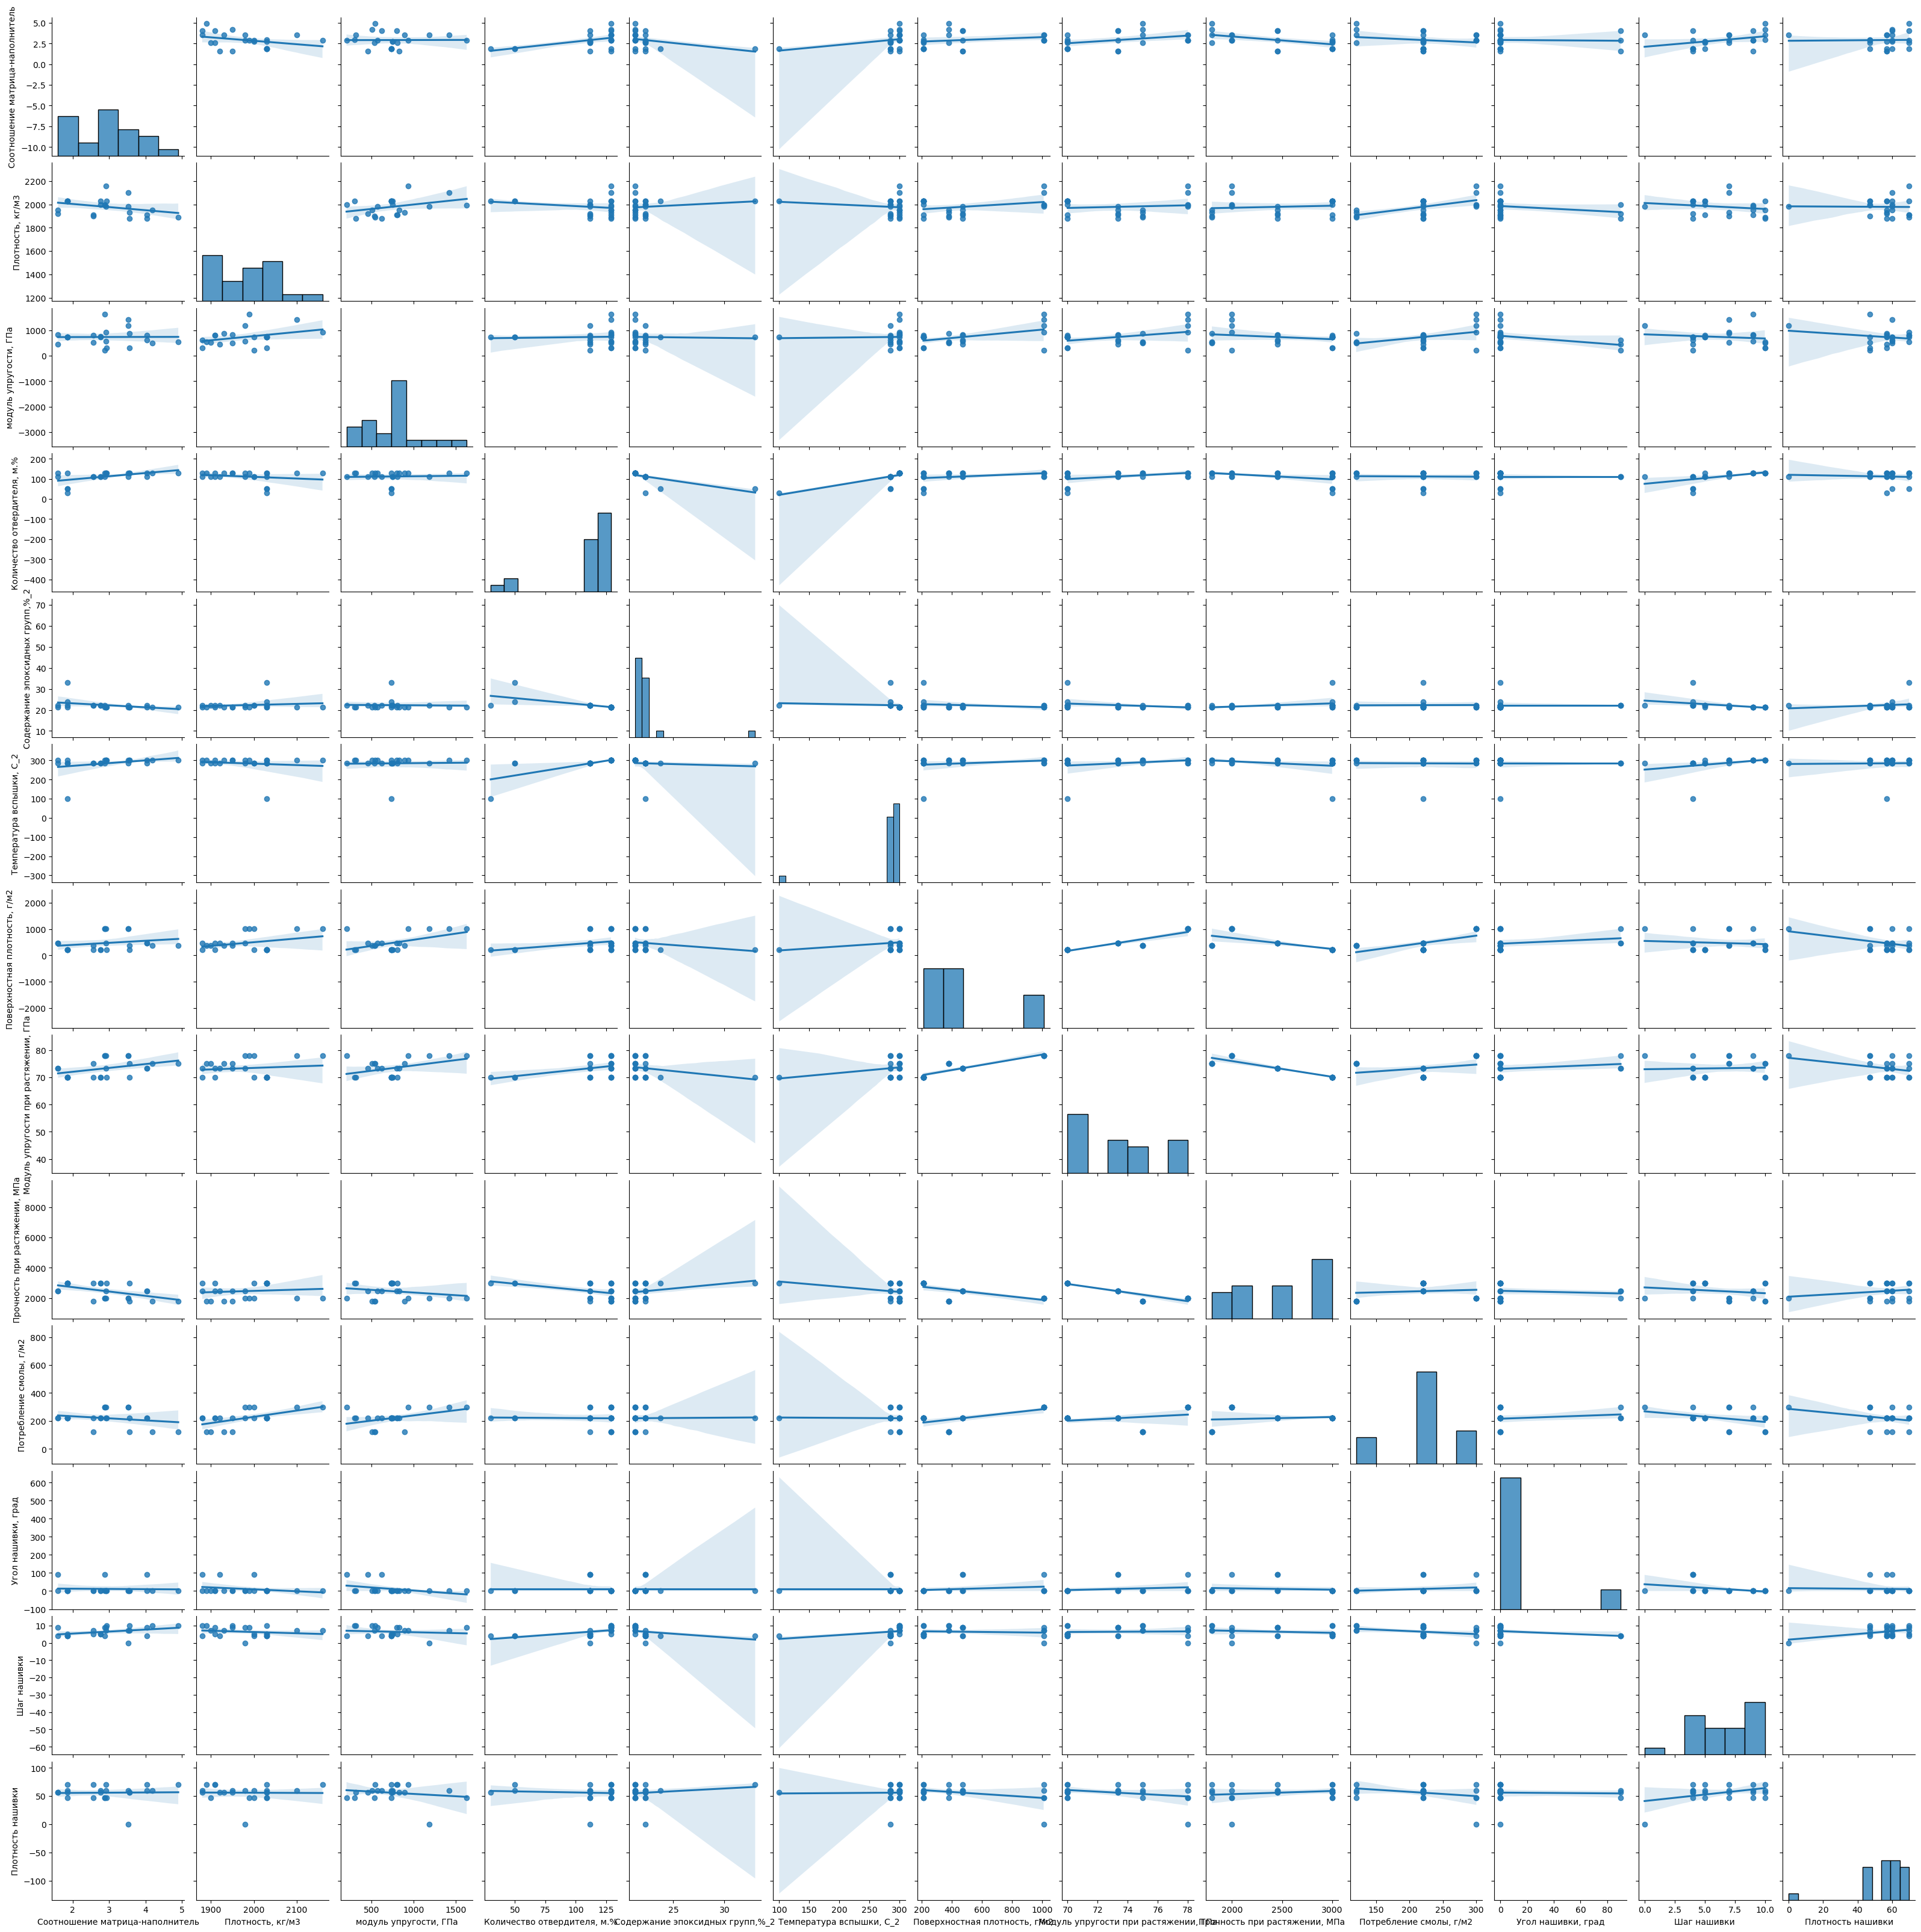

In [6]:
sns.pairplot(df_23, kind="reg")
plt.show()

### 1. Модуль упругости при растяжении

1.1 Переименование целевой переменной

In [7]:
df_1 = df_23.copy()
df_1['y_1'] = df_1['Модуль упругости при растяжении, ГПа']
df_1 = df_1.drop(columns=['Модуль упругости при растяжении, ГПа'])

1.2 Корреляционная матрица

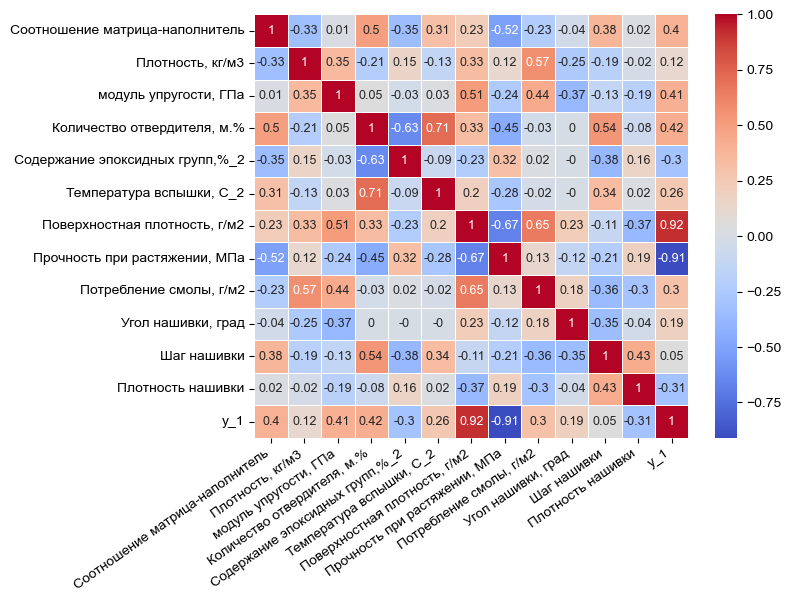

In [8]:
plt.figure(figsize=(7, 5.5))
sns.heatmap(df_1.corr(method='pearson').round(2), annot=True, annot_kws={"fontsize": 9}, cmap= 'coolwarm', linewidth=.5)
sns.set(rc={"xtick.labelsize":10, "ytick.labelsize":10})
plt.xticks(rotation=35, ha='right')
plt.show()

1.3 Удаление зависимых признаков

In [9]:
df_1 = df_1.drop(['Прочность при растяжении, МПа'], axis=1)

1.4 Вычисление (прогноз) коэффициента детерминации по коэф. корреляции Пирсона:  $R^2 = 1 - \frac{detA^+}{detA}$

In [10]:
corr_matrix = df_1.corr(method='pearson')    # корреляционная матрица
corr_yx = corr_matrix['y_1'][:-1]    # коэффициенты корреляции между y и x
corr_x = np.delete(np.array(corr_matrix), -1, axis=0)[:, :-1]    # коэффициенты парной корреляции между x

det_r_yx = np.linalg.det(corr_matrix)
det_r_x = np.linalg.det(corr_matrix.iloc[:-1, :-1])

R2 = 1 - det_r_yx / det_r_x
print(f"Прогноз коэф. детерминации R2:  {R2.round(5)}")

Прогноз коэф. детерминации R2:  1.0


1.5 Обучение модели (решение СЛАУ)

In [11]:
X_1 = df_1.copy()
y_1 = X_1.pop('y_1')

model_1 = LinearRegression().fit(X_1, y_1)
y_1_pred = model_1.predict(X_1)

In [12]:
print(f'R2 для обученной модели: {r2_score(y_1, y_1_pred)}')
print()
print('Коэффициенты регрессии:')
print(pd.DataFrame(model_1.coef_[:], index=X_1.columns, columns=['k']).round(4))
print()
print(f'Свободный член регрессии  a0 =  {model_1.intercept_.round(3)}')

R2 для обученной модели: 1.0

Коэффициенты регрессии:
                                      k
Соотношение матрица-наполнитель  0.0000
Плотность, кг/м3                 0.0000
модуль упругости, ГПа            0.0000
Количество отвердителя, м.%     -0.0000
Содержание эпоксидных групп,%_2  0.0000
Температура вспышки, С_2         0.0000
Поверхностная плотность, г/м2    0.0128
Потребление смолы, г/м2         -0.0282
Угол нашивки, град              -0.0000
Шаг нашивки                     -0.0000
Плотность нашивки               -0.0000

Свободный член регрессии  a0 =  73.513


### 2. Прочность при растяжении

2.1 Переименование целевой переменной

In [13]:
df_2 = df_23.copy()
df_2['y_2'] = df_2['Прочность при растяжении, МПа']
df_2 = df_2.drop(columns=['Прочность при растяжении, МПа'])

2.2 Корреляционная матрица

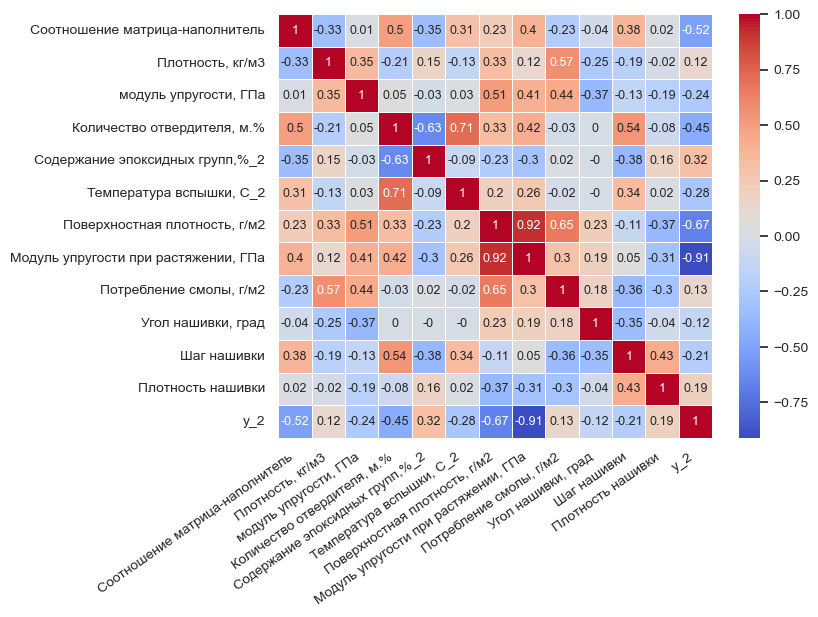

In [14]:
plt.figure(figsize=(7, 5.5))
sns.heatmap(df_2.corr(method='pearson').round(2), annot=True, annot_kws={"fontsize": 9}, cmap= 'coolwarm', linewidth=.5)
sns.set(rc={"xtick.labelsize":10, "ytick.labelsize":10})
plt.xticks(rotation=35, ha='right')
plt.show()

2.3 Удаление зависимых признаков

In [15]:
df_2 = df_2.drop(['Модуль упругости при растяжении, ГПа'], axis=1)

2.4 Вычисление (прогноз) коэффициента детерминации по коэф. корреляции Пирсона:  $R^2 = 1 - \frac{detA^+}{detA}$

In [16]:
corr_matrix = df_2.corr(method='pearson')    # корреляционная матрица
corr_yx = corr_matrix['y_2'][:-1]    # коэффициенты корреляции между y и x
corr_x = np.delete(np.array(corr_matrix), -1, axis=0)[:, :-1]    # коэффициенты парной корреляции между x

det_r_yx = np.linalg.det(corr_matrix)
det_r_x = np.linalg.det(corr_matrix.iloc[:-1, :-1])

R2 = 1 - det_r_yx / det_r_x
print(f"Прогноз коэф. детерминации R2:  {R2.round(5)}")

Прогноз коэф. детерминации R2:  1.0


2.5 Обучение модели (решение СЛАУ)

In [17]:
X_2 = df_2.copy()
y_2 = X_2.pop('y_2')

model_2 = LinearRegression().fit(X_2, y_2)
y_2_pred = model_2.predict(X_2)

In [18]:
print(f'R2 для обученной модели: {r2_score(y_2, y_2_pred)}')
print()
print('Коэффициенты регрессии:')
print(pd.DataFrame(model_2.coef_[:], index=X_2.columns, columns=['k']).round(3))
print()
print(f'Свободный член регрессии  a0 =  {model_2.intercept_.round(1)}')

R2 для обученной модели: 1.0

Коэффициенты регрессии:
                                     k
Соотношение матрица-наполнитель  0.000
Плотность, кг/м3                 0.000
модуль упругости, ГПа           -0.000
Количество отвердителя, м.%     -0.000
Содержание эпоксидных групп,%_2 -0.000
Температура вспышки, С_2         0.000
Поверхностная плотность, г/м2   -2.094
Потребление смолы, г/м2          8.440
Угол нашивки, град              -0.000
Шаг нашивки                     -0.000
Плотность нашивки               -0.000

Свободный член регрессии  a0 =  1582.9


### 3. Соотношение матрица-наполнитель

3.1 Переименование целевой переменной

In [19]:
df_3 = df_23.copy()
df_3['y_3'] = df_3['Соотношение матрица-наполнитель']
df_3 = df_3.drop(columns=['Соотношение матрица-наполнитель'])

3.2 Корреляционная матрица

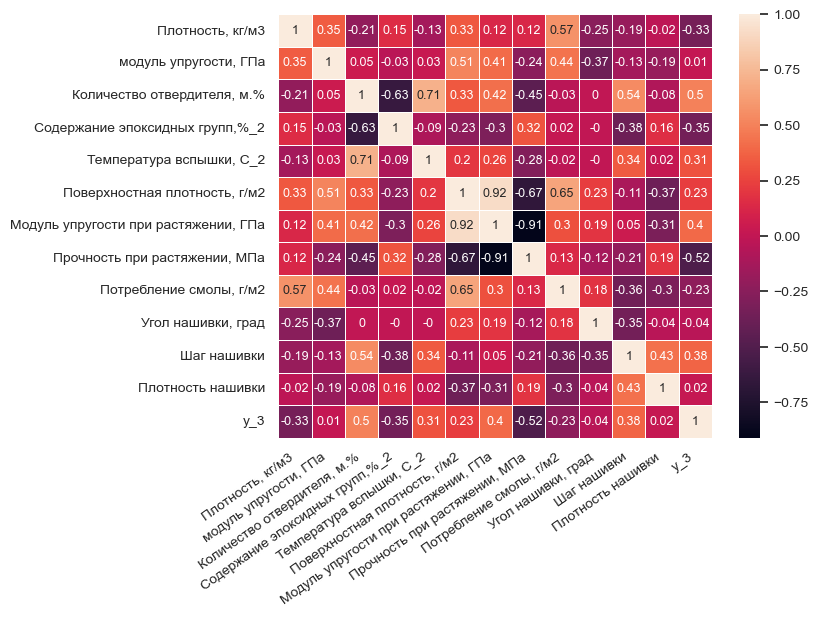

In [20]:
plt.figure(figsize=(7, 5.5))
sns.heatmap(df_3.corr(method='pearson').round(2), annot=True, annot_kws={"fontsize": 9}, linewidth=.5)
sns.set(rc={"xtick.labelsize":10, "ytick.labelsize":10})
plt.xticks(rotation=35, ha='right')
plt.show()

##### 3.3 Отбор признаков для соотношения матрица-наполнитель

3.3.1 Удаление зависимых признаков

In [21]:
df_3 = df_3.drop(['Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа'], axis=1)

In [22]:
X_3 = df_3.copy()
y_3 = X_3.pop('y_3')

3.3.2 Анализ значимости признаков

MI - показатель значимости любого (линейного и нелинейного) влияния признака (чем MI больше, тем больше признак влияет на целевую переменную);            
corr - коэф. корреляции Пирсона;                                                                                                                            
f - показатель значимости линейного влияния признака (чем f больше, тем больше признак влияет на целевую переменную);                                       
p - вероятность того, что целевая переменная не зависит от признака (показывает насколько верна гипотеза H0: "признак не влияет на целевую переменную")

In [23]:
mi_full = mutual_info_regression(X_3, y_3, random_state=2023)
f_full = f_regression(X_3, y_3)
f_p_full = pd.DataFrame({'MI':mi_full, 'corr':X_3.corrwith(y_3), 'f':f_full[0], 'p':f_full[1]}, index=X_3.columns)
f_p_full.round(3)

,MI,corr,f,p
"Плотность, кг/м3",0.381,-0.334,2.635,0.119
"модуль упругости, ГПа",0.215,0.007,0.001,0.976
"Количество отвердителя, м.%",0.178,0.503,7.106,0.014
"Содержание эпоксидных групп,%_2",0.129,-0.351,2.943,0.101
"Температура вспышки, С_2",0.140,0.314,2.300,0.144
"Поверхностная плотность, г/м2",0.274,0.229,1.163,0.293
"Потребление смолы, г/м2",0.093,-0.231,1.182,0.289
"Угол нашивки, град",0.025,-0.037,0.029,0.866
Шаг нашивки,0.075,0.382,3.592,0.072
Плотность нашивки,0.080,0.025,0.013,0.911


3.3.3 Анализ мультиколлинеарности признаков

In [24]:
def vif(df, features):    
    vif, tolerance = {}, {}
    for feature in features:
        X = [f for f in features if f != feature]
        X, y = df[X], df[feature]
        R2 = LinearRegression().fit(X, y).score(X, y)                
        tolerance[feature] = 1 - R2
        vif[feature] = 1 / (tolerance[feature])
    return pd.DataFrame({'VIF': vif, 'Tolerance': tolerance})
vif(df = df_3, features = df_3.columns)

,VIF,Tolerance
"Плотность, кг/м3",2.640367,0.378735
"модуль упругости, ГПа",2.897521,0.345123
"Количество отвердителя, м.%",7.671423,0.130354
"Содержание эпоксидных групп,%_2",3.118043,0.320714
"Температура вспышки, С_2",3.722725,0.268620
"Поверхностная плотность, г/м2",4.769748,0.209655
"Потребление смолы, г/м2",2.921042,0.342344
"Угол нашивки, град",3.822527,0.261607
Шаг нашивки,3.821057,0.261708
Плотность нашивки,2.362674,0.423249


3.3.4 Пошаговый отбор признаков (stepwise regression)

In [25]:
backselect = step_reg.backward_regression(X_3, y_3, 0.05, verbose=False)
forwardselect = step_reg.forward_regression(X_3, y_3, 0.05, verbose=False)
print(backselect)
print(forwardselect)

['Поверхностная плотность, г/м2', 'Потребление смолы, г/м2']
['Количество отвердителя, м.%']


#### В результате пошагового отбора рассматриваем следующие признаки:

In [26]:
df_3 = df_3.loc[:, ['Количество отвердителя, м.%', 'Поверхностная плотность, г/м2', 'Потребление смолы, г/м2', 'y_3']]

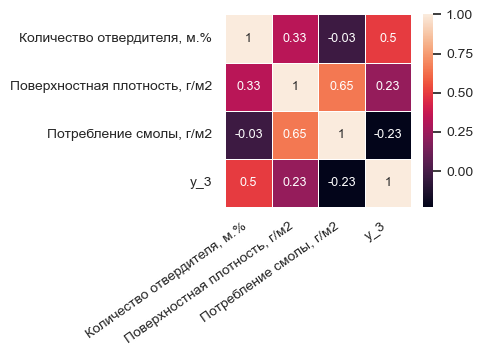

In [27]:
plt.figure(figsize=(3, 2.5))
sns.heatmap(df_3.corr(method='pearson').round(2), annot=True, annot_kws={"fontsize": 9}, linewidth=.5)
sns.set(rc={"xtick.labelsize":10, "ytick.labelsize":10})
plt.xticks(rotation=35, ha='right')
plt.show()

3.4 Вычисление (прогноз) коэффициента детерминации по коэф. корреляции Пирсона:  $R^2 = 1 - \frac{detA^+}{detA}$

In [28]:
corr_matrix = df_3.corr(method='pearson')    # корреляционная матрица
corr_yx = corr_matrix['y_3'][:-1]    # коэффициенты корреляции между y и x
corr_x = np.delete(np.array(corr_matrix), -1, axis=0)[:, :-1]    # коэффициенты парной корреляции между x

det_r_yx = np.linalg.det(corr_matrix)
det_r_x = np.linalg.det(corr_matrix.iloc[:-1, :-1])

R2 = 1 - det_r_yx / det_r_x
print(f"Прогноз коэф. детерминации R2:  {R2.round(3)}")

Прогноз коэф. детерминации R2:  0.393


3.5 Обучение модели (решение СЛАУ)

In [29]:
metrics = {}

3.5.1 LinearRegression

In [30]:
X_3 = df_3.drop(['y_3'], axis=1)

model_3 = LinearRegression().fit(X_3, y_3)
y_3_lr_pred = model_3.predict(X_3)

rmse_lr = np.sqrt(mean_squared_error(y_3, y_3_lr_pred)).round(3)
mae_lr = mean_absolute_error(y_3, y_3_lr_pred).round(3)
r2_lr = r2_score(y_3, y_3_lr_pred).round(3)
adjr2_lr = (1 - (1 - r2_score(y_3, y_3_lr_pred)) * (X_3.shape[0] - 1) / (X_3.shape[0] - X_3.shape[1])).round(3)
metrics['LinearRegression'] = (rmse_lr, mae_lr, r2_lr, adjr2_lr)

print(f'RMSE:   {rmse_lr}')
print()
print(f'MAE:    {mae_lr}')
print()
print(f'R2:     {r2_lr}')
print(f'Adj.R2: {adjr2_lr}')
print()
print('Коэффициенты регрессии:')
print(pd.DataFrame(model_3.coef_[:], index=X_3.columns, columns=['k']).round(5))
print()
print(f'Свободный член регрессии  a0 =  {model_3.intercept_.round(3)}')

RMSE:   0.687

MAE:    0.518

R2:     0.393
Adj.R2: 0.332

Коэффициенты регрессии:
                                     k
Количество отвердителя, м.%    0.01078
Поверхностная плотность, г/м2  0.00131
Потребление смолы, г/м2       -0.00808

Свободный член регрессии  a0 =  2.874


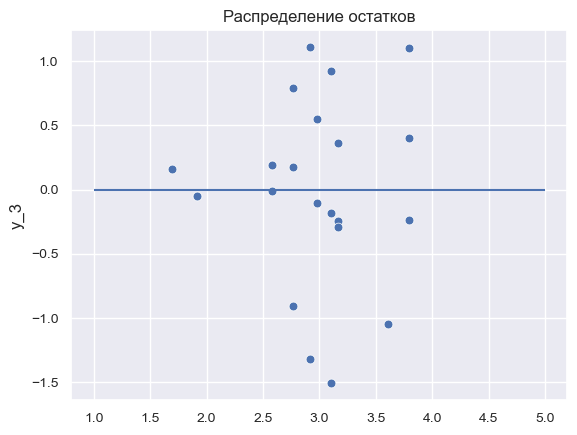

In [31]:
sns.scatterplot(x = y_3_lr_pred, y = y_3 - y_3_lr_pred, s = 40)
plt.hlines(y = 0, xmin = 1, xmax = 5)
plt.title('Распределение остатков')
plt.show()

3.5.2 ElasticNet

In [32]:
en = ElasticNet()
en_parameters = {'alpha': (0.01, 0.03, 0.1, 0.3, 1, 3, 10), 
                 'l1_ratio': (0.05, 0.1, 0.3, 0.5, 0.7, 0.9),
                 'random_state':[1, 7, 42, 100]
}
model_en = GridSearchCV(estimator=en,
                   param_grid=en_parameters,
                   scoring='r2', # 'neg_mean_absolute_error'
                   n_jobs=-1,
                   cv=10)
model_en.fit(X_3, y_3)
y_3_en_pred = model_en.predict(X_3)

rmse_en = np.sqrt(mean_squared_error(y_3, y_3_en_pred)).round(3)
mae_en = mean_absolute_error(y_3, y_3_en_pred).round(3)
r2_en = r2_score(y_3, y_3_en_pred).round(3)
adjr2_en = (1 - (1 - r2_score(y_3, y_3_en_pred)) * (X_3.shape[0] - 1) / (X_3.shape[0] - X_3.shape[1])).round(3)
metrics['ElasticNet'] = (rmse_en, mae_en, r2_en, adjr2_en)

print(f'RMSE:   {rmse_en}')
print()
print(f'MAE:    {mae_en}')
print()
print(f'R2:     {r2_en}')
print(f'Adj.R2: {adjr2_en}')
model_en.best_params_

RMSE:   0.687

MAE:    0.519

R2:     0.393
Adj.R2: 0.332


{'alpha': 3, 'l1_ratio': 0.1, 'random_state': 1}

3.5.3 GradientBoostingRegressor

In [33]:
gbr = GradientBoostingRegressor()
gbr_parameters = {
    'n_estimators' : range(100, 600, 100),
    'criterion' : ['friedman_mse', 'squared_error'],
    'max_depth' : range(1, 8),
    'min_samples_leaf' : range(2, 4),
    'min_samples_split' : range(4, 8, 2),
    'random_state':[1, 7, 42, 100]
}
model_gbr = GridSearchCV(estimator=gbr,
                   param_grid=gbr_parameters,
                   scoring='r2', # 'neg_mean_absolute_error'
                   n_jobs=-1,
                   cv=10)
model_gbr.fit(X_3, y_3)
y_3_gbr_pred = model_gbr.predict(X_3)

rmse_gbr = np.sqrt(mean_squared_error(y_3, y_3_gbr_pred)).round(3)
mae_gbr = mean_absolute_error(y_3, y_3_gbr_pred).round(3)
r2_gbr = r2_score(y_3, y_3_gbr_pred).round(3)
adjr2_gbr = (1 - (1 - r2_score(y_3, y_3_gbr_pred)) * (X_3.shape[0] - 1) / (X_3.shape[0] - X_3.shape[1])).round(3)
metrics['GradientBoosting'] = (rmse_gbr, mae_gbr, r2_gbr, adjr2_gbr)

print(f'RMSE:   {rmse_gbr}')
print()
print(f'MAE:    {mae_gbr}')
print()
print(f'R2:     {r2_gbr}')
print(f'Adj.R2: {adjr2_gbr}')
model_gbr.best_params_

RMSE:   0.676

MAE:    0.494

R2:     0.411
Adj.R2: 0.352


{'criterion': 'friedman_mse',
 'max_depth': 1,
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 500,
 'random_state': 42}

3.5.4 RandomForestRegressor

In [34]:
rfr = RandomForestRegressor()
rfr_parameters = {
    'n_estimators' : range(100, 600, 100),
    'criterion' : ['squared_error', 'absolute_error'],
    'max_depth' : range(1, 8),
    'min_samples_leaf' : range(2, 4),
    'min_samples_split' : range(4, 8, 2),
    'random_state':[1, 7, 42, 100]
}
model_rfr = GridSearchCV(estimator=rfr,
                   param_grid=rfr_parameters,
                   scoring='r2', # 'neg_mean_absolute_error'
                   n_jobs=-1,
                   cv=10)
model_rfr.fit(X_3, y_3)
y_3_rfr_pred = model_rfr.predict(X_3)

rmse_rfr = np.sqrt(mean_squared_error(y_3, y_3_rfr_pred)).round(3)
mae_rfr = mean_absolute_error(y_3, y_3_rfr_pred).round(3)
r2_rfr = r2_score(y_3, y_3_rfr_pred).round(3)
adjr2_rfr = (1 - (1 - r2_score(y_3, y_3_rfr_pred)) * (X_3.shape[0] - 1) / (X_3.shape[0] - X_3.shape[1])).round(3)
metrics['RandomForest'] = (rmse_rfr, mae_rfr, r2_rfr, adjr2_rfr)

print(f'RMSE:   {rmse_rfr}')
print()
print(f'MAE:    {mae_rfr}')
print()
print(f'R2:     {r2_rfr}')
print(f'Adj.R2: {adjr2_rfr}')
model_rfr.best_params_

RMSE:   0.677

MAE:    0.518

R2:     0.41
Adj.R2: 0.351


{'criterion': 'squared_error',
 'max_depth': 2,
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 100,
 'random_state': 7}

3.5.5 KNeighborsRegressor

In [35]:
knr = KNeighborsRegressor()
knr_parameters = {'n_neighbors' : range(1, 51, 2), 
          # 'weights' : ['uniform', 'distance'],
          # 'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
}
model_knr = GridSearchCV(estimator=knr,
                   param_grid=knr_parameters,
                   scoring='r2', # 'neg_mean_absolute_error'
                   n_jobs=-1,
                   cv=10)
model_knr.fit(X_3, y_3)
y_3_knr_pred = model_knr.predict(X_3)

rmse_knr = np.sqrt(mean_squared_error(y_3, y_3_knr_pred)).round(3)
mae_knr = mean_absolute_error(y_3, y_3_knr_pred).round(3)
r2_knr = r2_score(y_3, y_3_knr_pred).round(3)
adjr2_knr = (1 - (1 - r2_score(y_3, y_3_knr_pred)) * (X_3.shape[0] - 1) / (X_3.shape[0] - X_3.shape[1])).round(3)
metrics['KNeighbors'] = (rmse_knr, mae_knr, r2_knr, adjr2_knr)

print(f'RMSE:   {rmse_knr}')
print()
print(f'MAE:    {mae_knr}')
print()
print(f'R2:     {r2_knr}')
print(f'Adj.R2: {adjr2_knr}')
model_knr.best_params_

RMSE:   0.69

MAE:    0.545

R2:     0.387
Adj.R2: 0.326


{'n_neighbors': 5}

3.5.6 TheilSenRegressor

In [36]:
tsr = TheilSenRegressor()
tsr_parameters = {
    'random_state':[1, 7, 42, 100]
}
model_tsr = GridSearchCV(estimator=tsr,
                   param_grid=tsr_parameters,
                   scoring='r2', # 'neg_mean_absolute_error'
                   n_jobs=-1,
                   cv=10)
model_tsr.fit(X_3, y_3)
y_3_tsr_pred = model_tsr.predict(X_3)

rmse_tsr = np.sqrt(mean_squared_error(y_3, y_3_tsr_pred)).round(3)
mae_tsr = mean_absolute_error(y_3, y_3_tsr_pred).round(3)
r2_tsr = r2_score(y_3, y_3_tsr_pred).round(3)
adjr2_tsr = (1 - (1 - r2_score(y_3, y_3_tsr_pred)) * (X_3.shape[0] - 1) / (X_3.shape[0] - X_3.shape[1])).round(3)
metrics['TheilSen'] = (rmse_tsr, mae_tsr, r2_tsr, adjr2_tsr)

print(f'RMSE:   {rmse_tsr}')
print()
print(f'MAE:    {mae_tsr}')
print()
print(f'R2:     {r2_tsr}')
print(f'Adj.R2: {adjr2_tsr}')
model_tsr.best_params_

RMSE:   0.9

MAE:    0.7

R2:     -0.042
Adj.R2: -0.146


{'random_state': 1}

3.6 Сводная таблица метрик моделей для "Соотношение матрица - наполнитель"

In [37]:
df_metrics = pd.DataFrame(metrics)
df_metrics.index = ['RMSE', 'MAE', 'R2', 'Adj.R2']
df_metrics

,LinearRegression,ElasticNet,GradientBoosting,RandomForest,KNeighbors,TheilSen
RMSE,0.687,0.687,0.676,0.677,0.690,0.900
MAE,0.518,0.519,0.494,0.518,0.545,0.700
R2,0.393,0.393,0.411,0.410,0.387,-0.042
Adj.R2,0.332,0.332,0.352,0.351,0.326,-0.146


3.7 Доверительный интервал для предсказаний лучшей модели

In [38]:
y_pred = y_3_gbr_pred

n = len(y_3)
p = X_3.shape[1]
se = np.sqrt(np.sum((y_3 - y_pred)**2) / (n - p))

# Уровень доверия
confidence_level = 0.95
t_value = stats.t.ppf((1 + confidence_level) / 2, n - p)

lower = y_pred - t_value * se
upper = y_pred + t_value * se

y_test = y_3.values

print("Доверительный интервал для прогноза:")
print(f"Нижняя граница:  {lower[:12].round(2)}")
print(f"y_3:             {y_3.values[:12].round(2)}")
print(f"y_pred:          {y_pred[:12].round(2)}")
print(f"Верхняя граница: {upper[:12].round(2)}")
print()
print(f"Разброс тестовых значений:       {y_3.values.min().round(2)}; {y_3.values.max().round(2)}")
print(f"Разброс предсказанных значений:  {y_pred.min().round(2)}; {y_pred.max().round(2)}")
print()
print(f"Наименьшая нижняя граница доверительного интервала:  {lower.min().round(2)}")
print(f"Набольшая верхняя граница доверительного интервала:  {upper.max().round(2)}")

Доверительный интервал для прогноза:
Нижняя граница:  [0.34 0.34 0.34 1.37 1.09 1.09 1.09 2.08 2.36 1.75 1.75 1.75]
y_3:             [1.86 1.86 1.86 1.86 2.77 2.77 2.57 2.56 3.56 3.53 2.92 2.88]
y_pred:          [1.86 1.86 1.86 2.88 2.6  2.6  2.6  3.59 3.87 3.26 3.26 3.26]
Верхняя граница: [3.37 3.37 3.37 4.39 4.12 4.12 4.12 5.11 5.38 4.77 4.77 4.77]

Разброс тестовых значений:       1.6; 4.9
Разброс предсказанных значений:  1.86; 3.87

Наименьшая нижняя граница доверительного интервала:  0.34
Набольшая верхняя граница доверительного интервала:  5.38


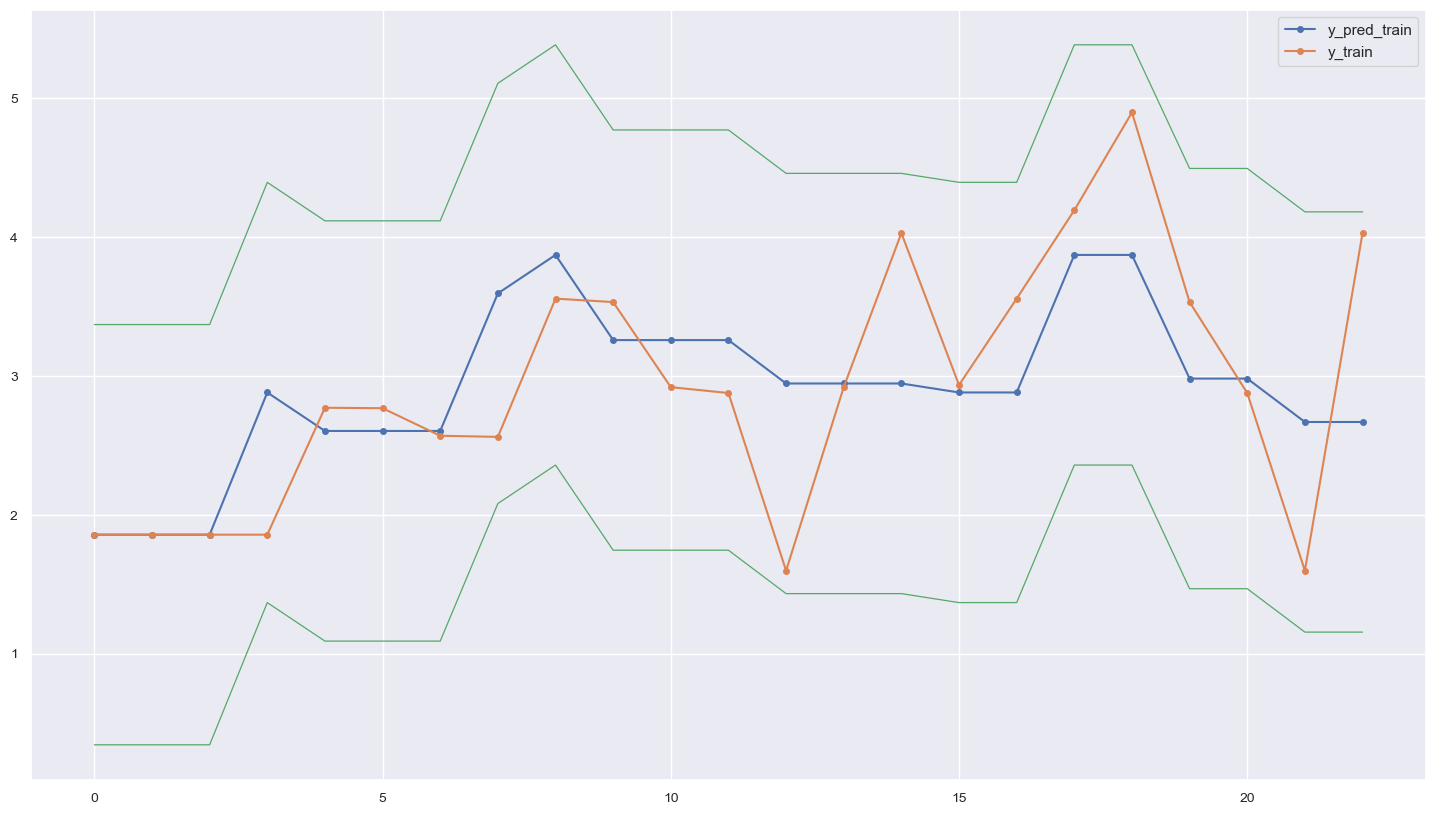

In [39]:
plt.figure(figsize=(18, 10))
plt.plot(y_pred, label='y_pred_train', marker='o', markersize=4)
plt.plot(y_3, label='y_train', marker='o', markersize=4)
plt.plot(lower, linewidth = 0.9, color='g')
plt.plot(upper, linewidth = 0.9, color='g')
plt.legend()
plt.grid(True)
plt.show()